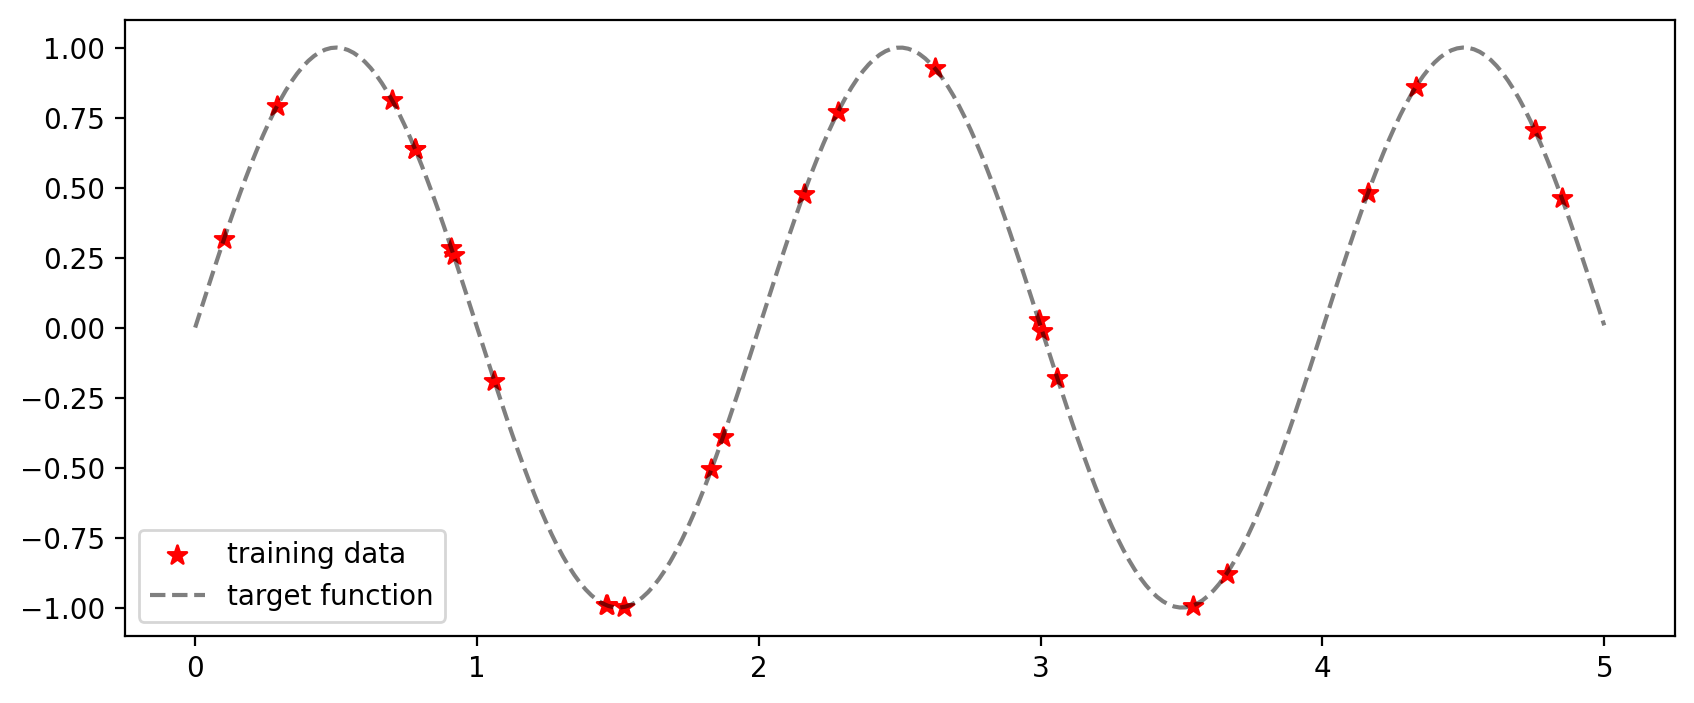

In [1]:
from gplib import *
import numpy as np 
import matplotlib.pyplot as plt

# Training data 
np.random.seed(42)
X = np.random.uniform(0.0, 5.0, 25).reshape(-1,1)
y = np.sin(3.14 * X).ravel()
y2 = np.exp(-X).ravel()

# Testing data 
Xtest = np.linspace(0.0, 5.0, 250).reshape(-1,1)
ytest = np.sin(3.14*Xtest).ravel()

plt.figure(figsize=(10,4), dpi = 200)
plt.scatter(X, y, marker = '*', s=50, label = 'training data', color = 'red')
plt.plot(Xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target function', alpha = 0.5)
plt.legend()

100%|██████████| 100/100 [00:01<00:00, 95.43it/s, Loss: -56.46750, LR: 1.00e-02]


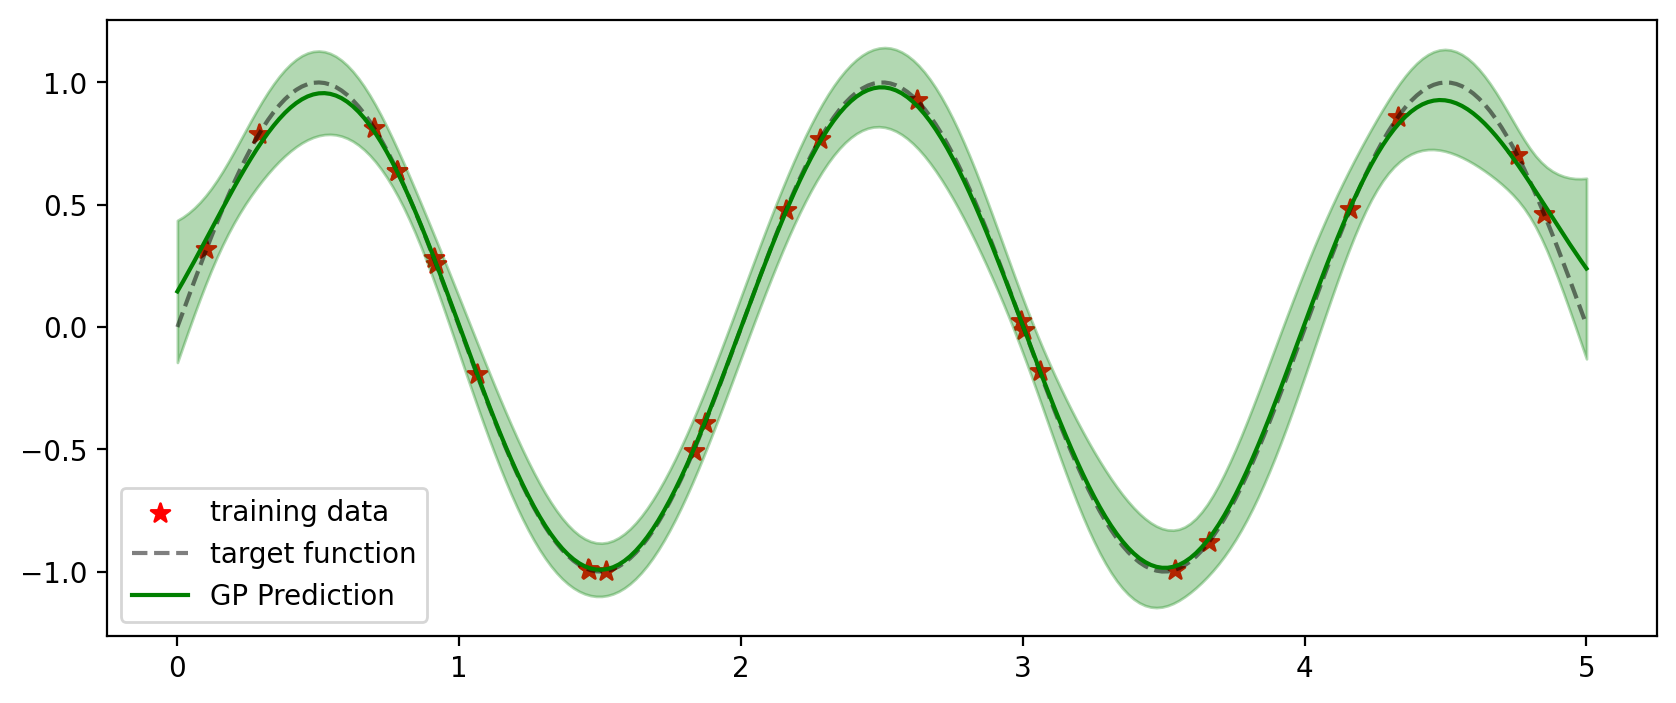

In [2]:
# SimpleGP 
model = SimpleGP(X, y, rbf, X.shape[1]+1, noise_var = 1e-2, jitter=1e-6)

model.optimize(
    lr = 1e-2, 
    epochs = 100, 
    batch_size=250,
    beta1 = 0.9, 
    beta2 = 0.99,
    shuffle = False
)

mean, cov = model.predict(Xtest)
conf = 2*np.sqrt(np.diag(cov))

plt.figure(figsize=(10,4), dpi = 200)
plt.scatter(X, y, marker = '*', s=50, label = 'training data', color = 'red')
plt.plot(Xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target function', alpha = 0.5)
plt.plot(Xtest, mean, color = 'green', label = 'GP Prediction')
plt.fill_between(Xtest.ravel(), mean.ravel() - conf, mean.ravel() + conf, alpha = 0.3, color = 'green')
plt.legend()

In [2]:
# Log-Normal GP 
model = model = LogNormalGP(X, y, rbf, X.shape[1]+1, mu=0.0, cov = 1.0, N_mc = 10, noise_var = 1e-2, jitter=1e-6)

In [3]:
model.optimize(lr = 1e-1, epochs = 250, beta1 = 0.9, beta2=0.999, params_to_optimize=['k_mu', 'k_L'], batch_size = 250, shuffle = False)

100%|██████████| 1000/1000 [00:14<00:00, 68.74it/s, Loss: -57.81611, LR: 1.00e-01]


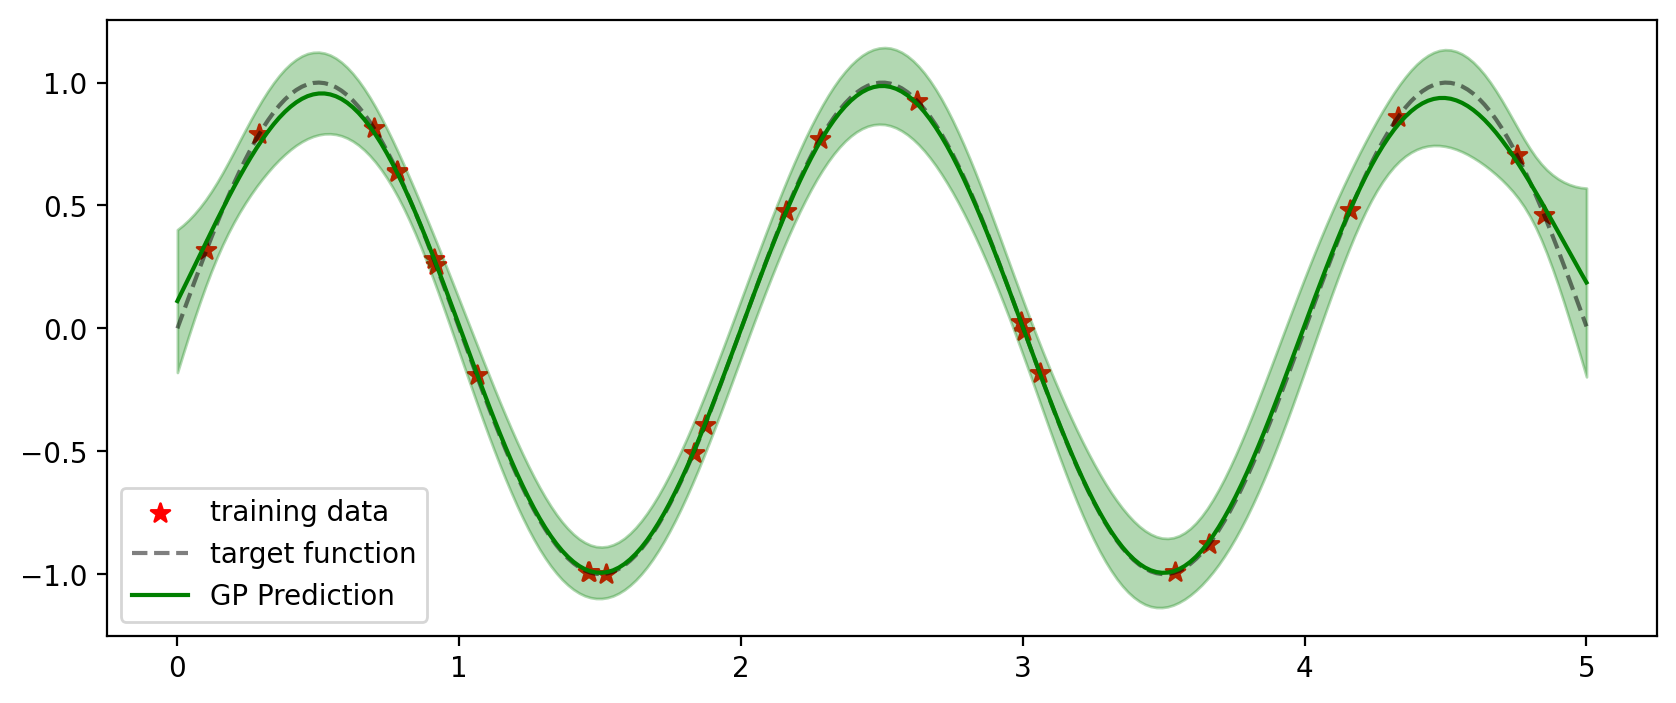

In [4]:
mean, cov = model.predict(Xtest, N_mc = 1000)
conf = 2*np.sqrt(np.diag(cov))

plt.figure(figsize=(10,4), dpi = 200)
plt.scatter(X, y, marker = '*', s=50, label = 'training data', color = 'red')
plt.plot(Xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target function', alpha = 0.5)
plt.plot(Xtest, mean, color = 'green', label = 'GP Prediction')
plt.fill_between(Xtest.ravel(), mean.ravel() - conf, mean.ravel() + conf, alpha = 0.3, color = 'green')
plt.legend()

In [23]:
# Stochastic Variational GP
model = SVGP(10, X, y, rbf, X.shape[1]+1, N_mc = 10, xmin=0, xmax=5, noise_var = 1e-6, jitter=1e-6)

In [30]:
model.optimize(lr = 1e-3, epochs = 250, beta1 = 0.9, beta2=0.1, params_to_optimize=['Z', 'q_mu', 'q_L'], batch_size = 250, shuffle = False)

100%|██████████| 250/250 [00:10<00:00, 24.68it/s, Loss: 4129.56768, LR: 1.00e-03]


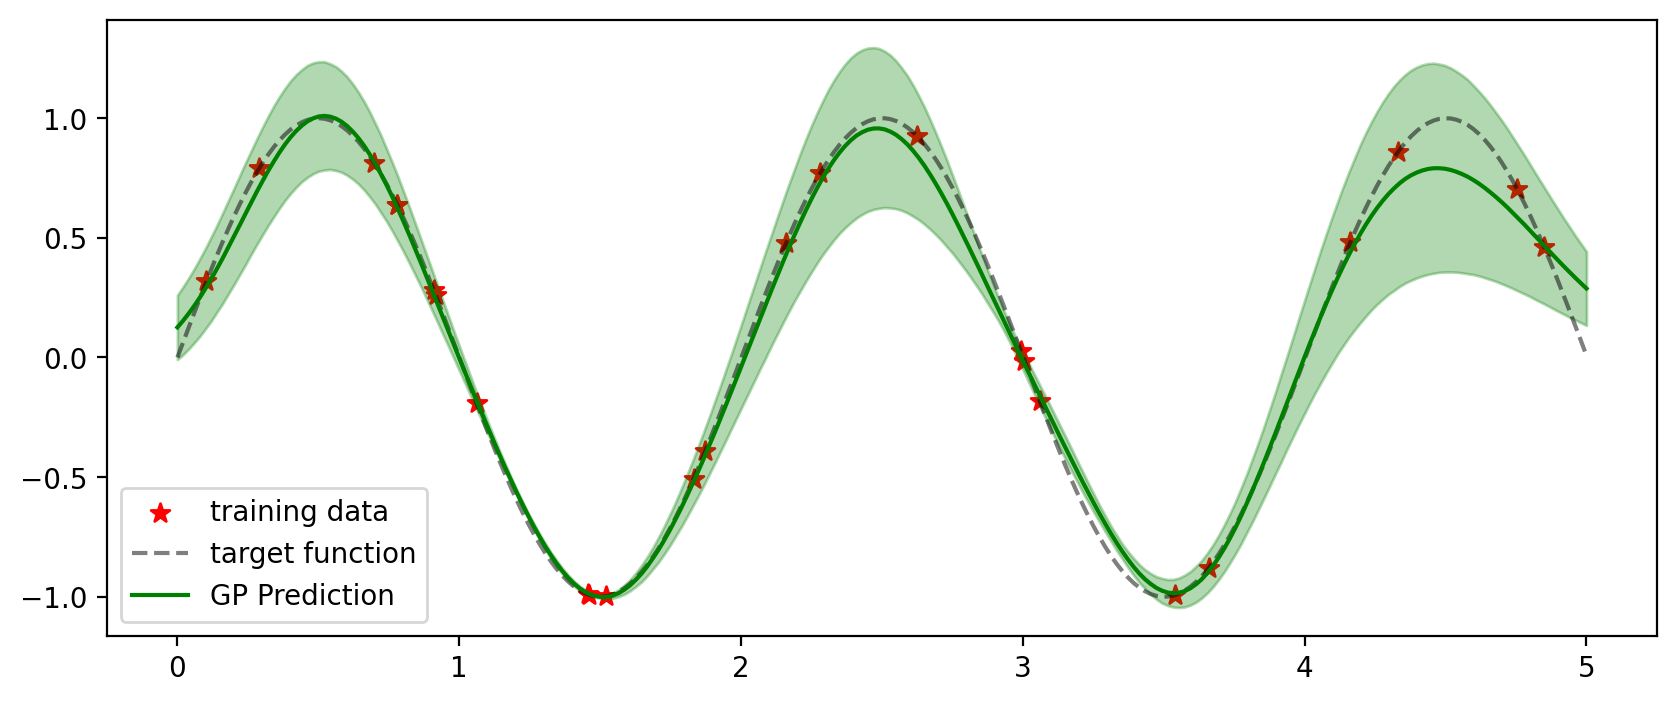

In [26]:
mean, cov = model.predict(Xtest)
conf = 2*np.sqrt(np.diag(cov))

plt.figure(figsize=(10,4), dpi = 200)
plt.scatter(X, y, marker = '*', s=50, label = 'training data', color = 'red')
plt.plot(Xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target function', alpha = 0.5)
plt.plot(Xtest, mean, color = 'green', label = 'GP Prediction')
plt.fill_between(Xtest.ravel(), mean.ravel() - conf, mean.ravel() + conf, alpha = 0.3, color = 'green')
plt.legend()

In [5]:
# Log-Normal Stochastic Variational GP
model = LogNormalSVGP(15, X, y, rbf, X.shape[1]+1, k_mu = 0.0, k_cov = 1.0, N_mc = 10, xmin=0, xmax=5, noise_var = 1e-6, jitter=1e-6)

In [7]:
model.optimize(lr = 1e-4, epochs = 250, beta1 = 0.9, beta2=0.1, params_to_optimize=['k_mu', 'k_L', 'Z', 'q_mu', 'q_L'], batch_size = 250, shuffle = False)

100%|██████████| 250/250 [00:07<00:00, 32.36it/s, Loss: 100.93640, LR: 1.00e-04]


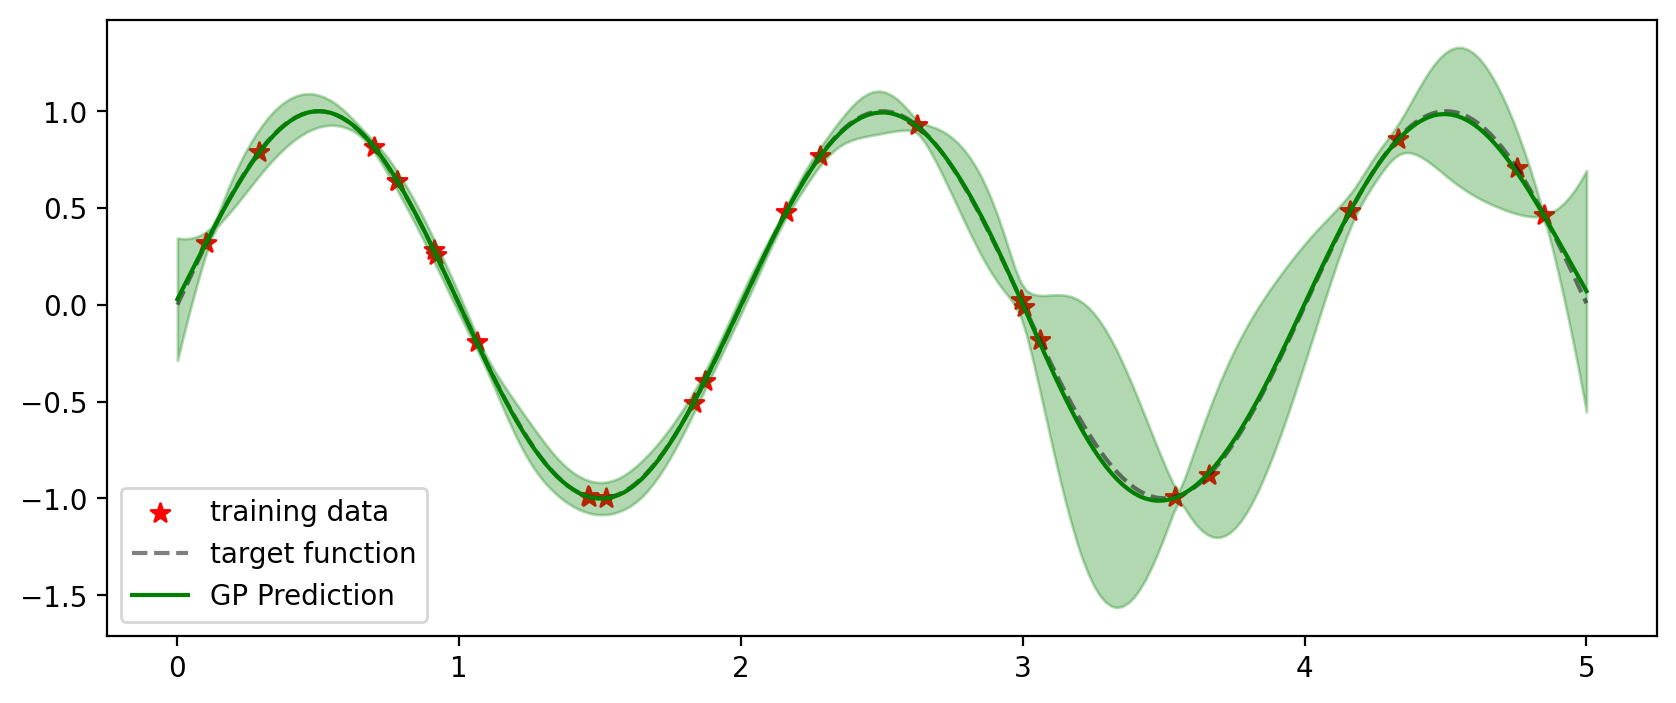

In [8]:
mean, cov = model.predict(Xtest, N_mc = 100, seed = 42)
conf = 2*np.sqrt(np.diag(cov))

plt.figure(figsize=(10,4), dpi = 200)
plt.scatter(X, y, marker = '*', s=50, label = 'training data', color = 'red')
plt.plot(Xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target function', alpha = 0.5)
plt.plot(Xtest, mean, color = 'green', label = 'GP Prediction')
plt.fill_between(Xtest.ravel(), mean.ravel() - conf, mean.ravel() + conf, alpha = 0.3, color = 'green')
plt.legend()

In [5]:
model = DeltaGP(X, y, y2, rbf, X.shape[1]+1, noise_var = 1e-5, jitter=1e-6)

In [6]:
model.optimize(lr = 1e-3, epochs = 250, beta1 = 0.9, beta2=0.1, params_to_optimize=['k_param'], batch_size = 250, shuffle = False)

100%|██████████| 250/250 [00:02<00:00, 112.58it/s, Loss: -114.51273, LR: 1.00e-03]


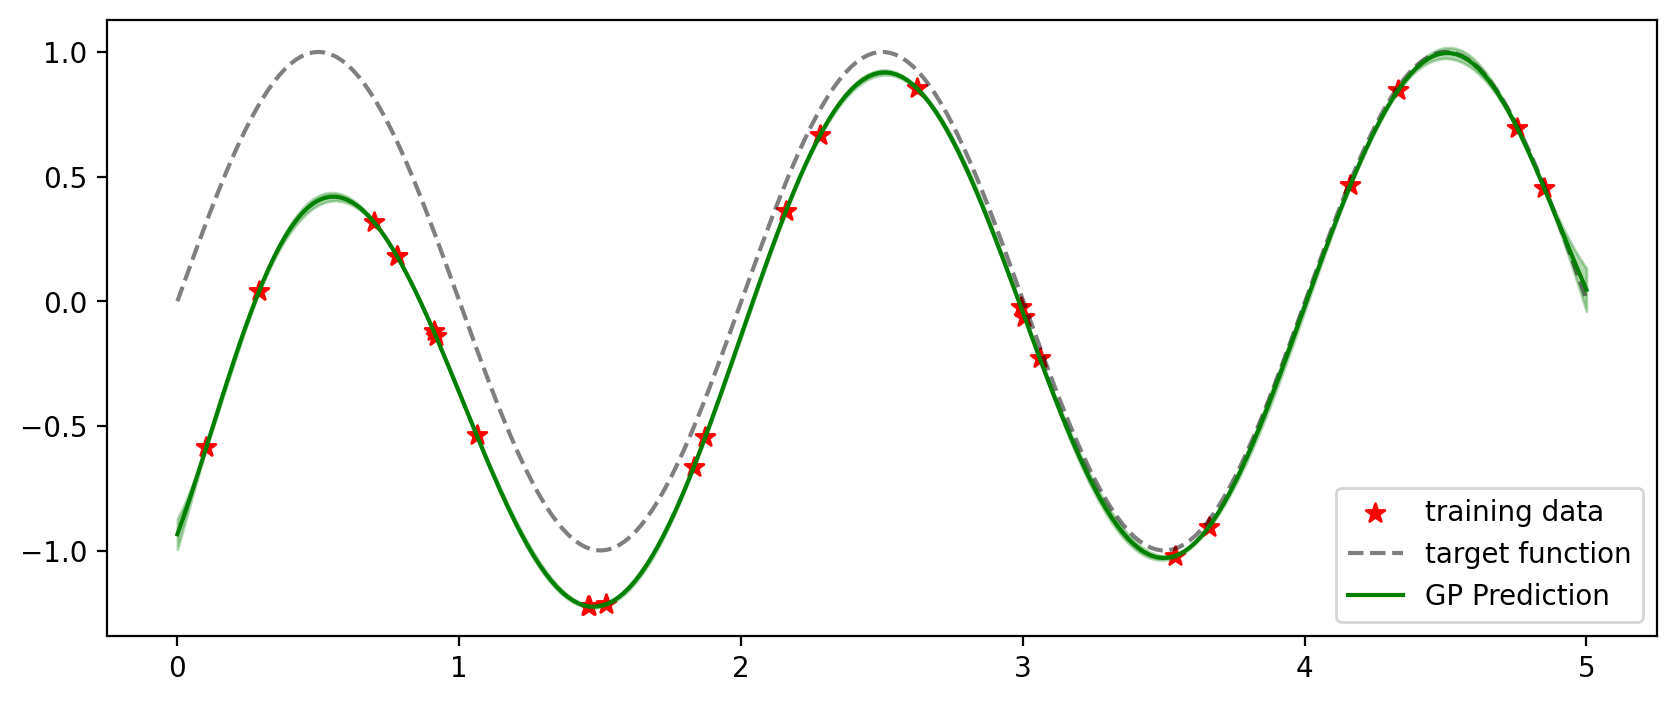

In [8]:
mean, cov = model.predict(Xtest)
conf = 2*np.sqrt(np.diag(cov))

plt.figure(figsize=(10,4), dpi = 200)
plt.scatter(X, y-y2, marker = '*', s=50, label = 'training data', color = 'red')
plt.plot(Xtest, ytest, linestyle = 'dashed', color = 'black', label = 'target function', alpha = 0.5)
plt.plot(Xtest, mean, color = 'green', label = 'GP Prediction')
plt.fill_between(Xtest.ravel(), mean.ravel() - conf, mean.ravel() + conf, alpha = 0.3, color = 'green')
plt.legend()